# Aviation Accidents Data Analysis

* Student name: Tracy Gwehona
* Student pace: Full Time
* Instructor name: Mwikali


## Business Understanding

### Overview

The company is planning to enter into the aviation industry in order to diversify its assets, with the intention of purchasing and operating airplanes for commercial and private enterprises. This project analyzes aviation accident data sourced from Kaggle to identify airplanes with the lowest risk to the company.
A descriptive analysis of the data such as accident frequency, severity and other factors will highlight which aircrafts pose the least safety, financial and operational risks.
The company can use this analysis to decide which airplanes to purchase.

### Business Problem

The company may be able to minimize the risks of safety and financial liabilities associated with the operation of an aircraft by selecting the safest and most reliable models.
I aim to:
1. Identify low risk airplane models.
2. Evaluate the severity and frequency of accidents.
3. Assess factors that contribute to accidents.
4. Provide recommendations for selecting the best airplanes based on the data analysis results.

Doing so will help the company to make informed decisions on which airplanes to purchase.

## Data Understanding

The [aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) sourced from Kaggle originally obtained from the [National Transportation Safety Board](https://www.ntsb.gov/Pages/home.aspx) contains a detailed record of airplane accidents. Every accident has a unique ID, that is, 'Event.Id' and includes important details such as the date, location, airplane make and model, the severity of injuries, etc. The dataset also captures factors like weather conditions and the phase of flight. This dataset allows for comprehensive analysis of accident patterns, risk factors, etc and to understand the relationship between airplane models, accident severity, and environmental factors

In [1]:
# Import standard packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load dataset

aviation_data = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
aviation_data.shape

(90348, 31)

In [5]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Preparation

### Data Cleaning

In [7]:
# Make column names easier to use

aviation_data.columns = aviation_data.columns.str.lower().str.replace('.', '_')

In [8]:
# Check for duplicate entries based on accident_number column since it is the primary key of this dataset

aviation_data.duplicated('accident_number').sum()

1484

In [9]:
# Remove duplicates

aviation_data = aviation_data.drop_duplicates(subset='accident_number', keep='first')

In [10]:
# Check for null values

aviation_data.isna().sum()

event_id                      1
investigation_type            0
accident_number               1
event_date                    1
location                     53
country                     227
latitude                  54501
longitude                 54510
airport_code              38631
airport_name              36090
injury_severity             991
aircraft_damage            3186
aircraft_category         56601
registration_number        1318
make                         64
model                        93
amateur_built               103
number_of_engines          6075
engine_type                7058
far_description           56867
schedule                  76288
purpose_of_flight          6182
air_carrier               72229
total_fatal_injuries      11402
total_serious_injuries    12511
total_minor_injuries      11934
total_uninjured            5913
weather_condition          4482
broad_phase_of_flight     27140
report_status              6362
publication_date          15219
dtype: i

In [11]:
# Drop rows with null values in the primary key column; 'accident_number'

aviation_data = aviation_data.dropna(subset = ['accident_number'])

In [12]:
# Check the percentage of mising values for every column

aviation_data.isna().sum()/len(aviation_data)*100

event_id                   0.000000
investigation_type         0.000000
accident_number            0.000000
event_date                 0.000000
location                   0.058517
country                    0.254324
latitude                  61.330362
longitude                 61.340490
airport_code              43.471411
airport_name              40.611953
injury_severity            1.114074
aircraft_damage            3.584169
aircraft_category         63.693551
registration_number        1.482057
make                       0.070896
model                      0.103530
amateur_built              0.114783
number_of_engines          6.835241
engine_type                7.941438
far_description           63.992888
schedule                  85.847878
purpose_of_flight          6.955651
air_carrier               81.280173
total_fatal_injuries      12.829862
total_serious_injuries    14.077850
total_minor_injuries      13.428536
total_uninjured            6.652938
weather_condition          5

In [13]:
# Drop columns that have more than 35% of their data missing

drop_columns =  ['latitude', 'longitude', 'airport_code', 'airport_name', 'aircraft_category', 'far_description', 'schedule',
                'air_carrier']
aviation_data = aviation_data.drop(columns = drop_columns)

In [14]:
# Drop columns that are irrelevant to my analysis

drop_columns_2 = ['event_id', 'accident_number', 'location', 'country', 'registration_number', 'broad_phase_of_flight', 'report_status', 
                  'publication_date']
aviation_data = aviation_data.drop(columns = drop_columns_2)

In [15]:
aviation_data.isna().sum()

investigation_type            0
event_date                    0
injury_severity             990
aircraft_damage            3185
make                         63
model                        92
amateur_built               102
number_of_engines          6074
engine_type                7057
purpose_of_flight          6181
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4481
dtype: int64

In [16]:
# Drop the rows with missing values

aviation_data = aviation_data.dropna(subset=['make', 'model', 'amateur_built', 'number_of_engines', 'total_fatal_injuries', 
                                            'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'])

In [17]:
# Fill missing values of dtype object columns with 'Unknown'

aviation_data.fillna('Unknown', inplace=True)

In [18]:
aviation_data.isna().sum()

investigation_type        0
event_date                0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
dtype: int64

In [19]:
# Format the columns with entries of type string

columns = ['investigation_type', 'aircraft_damage', 'make', 'amateur_built', 'engine_type', 'purpose_of_flight', 
           'weather_condition']

for column in columns:
    aviation_data[column] = aviation_data[column].str.strip()
    aviation_data[column] = aviation_data[column].str.lower()

In [20]:
# Standardize missing data representations

aviation_data['injury_severity'].replace('unavailable', 'unknown', inplace=True)
aviation_data['engine_type'].replace('unk', 'unknown', inplace=True)
aviation_data['weather_condition'].replace('unk', 'unknown', inplace=True)
aviation_data['model'].replace('unk', 'unknown', inplace=True)

In [21]:
# Create year column for future analysis

aviation_data['year'] = [date[:4] for date in aviation_data['event_date']]

In [22]:
# Reset the index of the dataframe

aviation_data.reset_index(drop=True, inplace=True)

In [23]:
aviation_data

,investigation_type,event_date,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,year
0,accident,1948-10-24,Fatal(2),destroyed,stinson,108-3,no,1.0,reciprocating,personal,2.0,0.0,0.0,0.0,unknown,1948
1,accident,1962-07-19,Fatal(4),destroyed,piper,PA24-180,no,1.0,reciprocating,personal,4.0,0.0,0.0,0.0,unknown,1962
2,accident,1977-06-19,Fatal(2),destroyed,rockwell,112,no,1.0,reciprocating,personal,2.0,0.0,0.0,0.0,imc,1977
3,accident,1981-08-01,Fatal(4),destroyed,cessna,180,no,1.0,reciprocating,personal,4.0,0.0,0.0,0.0,imc,1981
4,accident,1982-01-01,Non-Fatal,substantial,cessna,140,no,1.0,reciprocating,personal,0.0,0.0,0.0,2.0,vmc,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69574,accident,2022-12-13,Non-Fatal,substantial,piper,PA42,no,2.0,unknown,unknown,0.0,0.0,0.0,1.0,unknown,2022
69575,accident,2022-12-14,Non-Fatal,substantial,cirrus design corp,SR22,no,1.0,unknown,personal,0.0,0.0,0.0,1.0,vmc,2022
69576,accident,2022-12-15,Non-Fatal,substantial,swearingen,SA226TC,no,2.0,unknown,unknown,0.0,0.0,0.0,1.0,unknown,2022
69577,accident,2022-12-16,Minor,substantial,cessna,R172K,no,1.0,unknown,personal,0.0,1.0,0.0,0.0,vmc,2022


## Data Analysis

### Trend Analysis of Injuries and Uninjured Passengers in Aviation Accidents Over Time

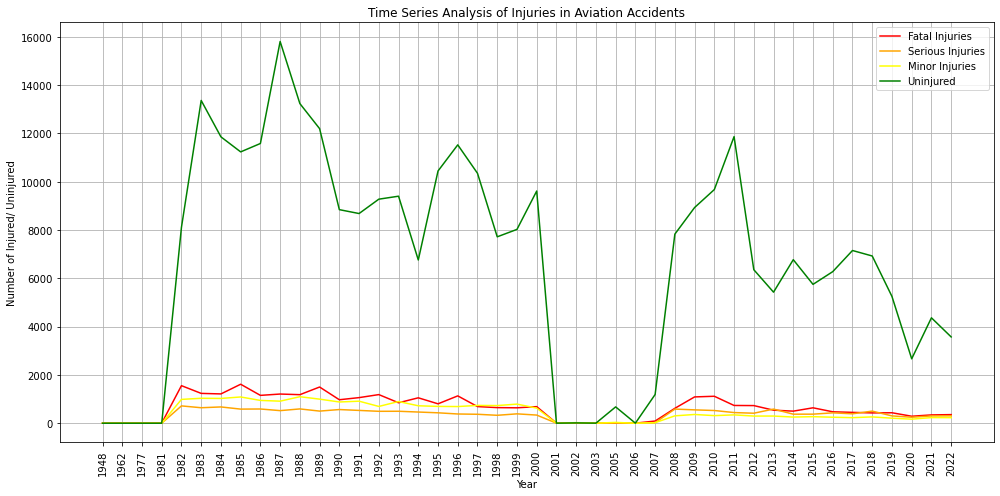

In [24]:
# Group by year
year_grouped = aviation_data.groupby('year').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum',
    'total_uninjured': 'sum'
}).reset_index()

# Plot
plt.figure(figsize=(14, 7))

plt.plot(year_grouped['year'], year_grouped['total_fatal_injuries'], label='Fatal Injuries', color='red')
plt.plot(year_grouped['year'], year_grouped['total_serious_injuries'], label='Serious Injuries', color='orange')
plt.plot(year_grouped['year'], year_grouped['total_minor_injuries'], label='Minor Injuries', color='yellow')
plt.plot(year_grouped['year'], year_grouped['total_uninjured'], label='Uninjured', color='green')

# Adding labels and title
plt.title('Time Series Analysis of Injuries in Aviation Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Injured/ Uninjured')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.grid()

It seems that the total uninjured passengers are higher than the total fatal, serious or minor injured passengers since 1948 till 2022 which is good. There has been an increase and decrease throughout the period. 
But ideally, there has been a decrease of uninjured since the year 1987.

The fatally, seriously and minorly injured number of passengers remain below 2000 people over the 74-year period.

### Injured Passengers by the Plane Model

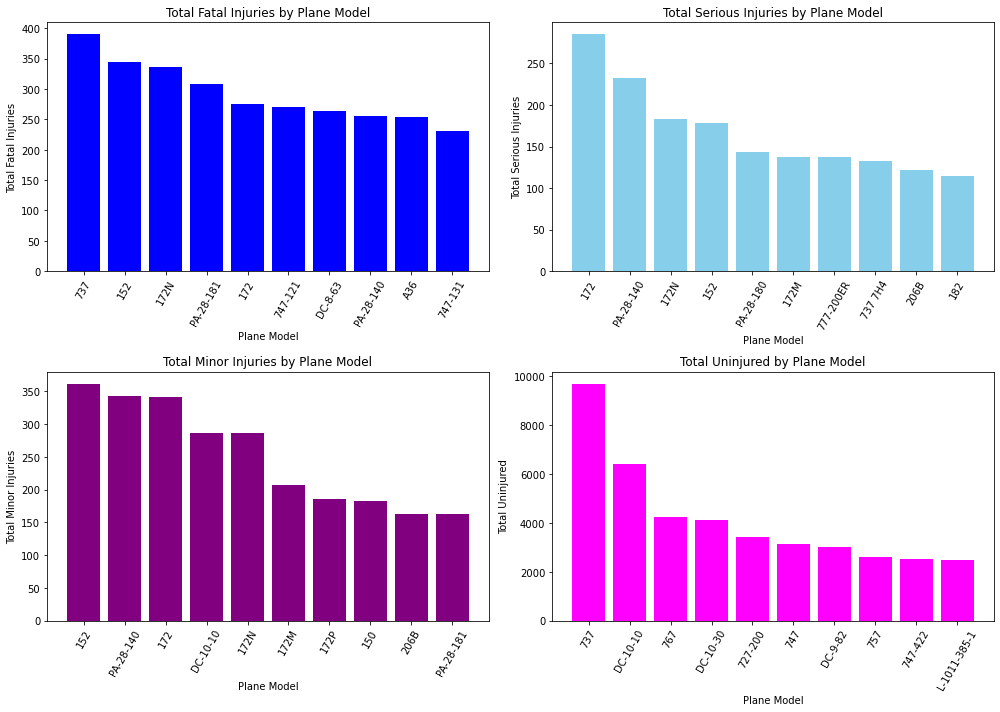

In [25]:
# Group by model 
model_grouped = aviation_data.groupby('model').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum',
    'total_uninjured': 'sum'
}).reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (14, 10))

# Plot total fatal injuries
fatal_injuries = model_grouped.sort_values(by='total_fatal_injuries', ascending=False)[:10]
axes[0, 0].bar(fatal_injuries['model'], fatal_injuries['total_fatal_injuries'], color='blue')
axes[0, 0].set_title('Total Fatal Injuries by Plane Model')
axes[0, 0].set_xlabel('Plane Model')
axes[0, 0].set_ylabel('Total Fatal Injuries')
axes[0, 0].tick_params(axis='x', rotation=60)

# Plot total serious injuries
serious_injuries = model_grouped.sort_values(by='total_serious_injuries', ascending=False)[:10]
axes[0, 1].bar(serious_injuries['model'], serious_injuries['total_serious_injuries'], color='skyblue')
axes[0, 1].set_title('Total Serious Injuries by Plane Model')
axes[0, 1].set_xlabel('Plane Model')
axes[0, 1].set_ylabel('Total Serious Injuries')
axes[0, 1].tick_params(axis='x', rotation=60)

# Plot total minor injuries
minor_injuries = model_grouped.sort_values(by='total_minor_injuries', ascending=False)[:10]
axes[1, 0].bar(minor_injuries['model'], minor_injuries['total_minor_injuries'], color='purple')
axes[1, 0].set_title('Total Minor Injuries by Plane Model')
axes[1, 0].set_xlabel('Plane Model')
axes[1, 0].set_ylabel('Total Minor Injuries')
axes[1, 0].tick_params(axis='x', rotation=60)

# Plot total uninjured
uninjured = model_grouped.sort_values(by='total_uninjured', ascending=False)[:10]
axes[1, 1].bar(uninjured['model'], uninjured['total_uninjured'], color='magenta')
axes[1, 1].set_title('Total Uninjured by Plane Model')
axes[1, 1].set_xlabel('Plane Model')
axes[1, 1].set_ylabel('Total Uninjured')
axes[1, 1].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

- Model 737 has the most fatal injuries.
- Model 172 has the most serious injuries.
- Model 152 has the most minor injuries.
- Model 737 has the most uninjured.

Even though model 737 has the most fatal injuries, it also has the most uninjured which is a good thing.

### Injured Passengers by Plane Make

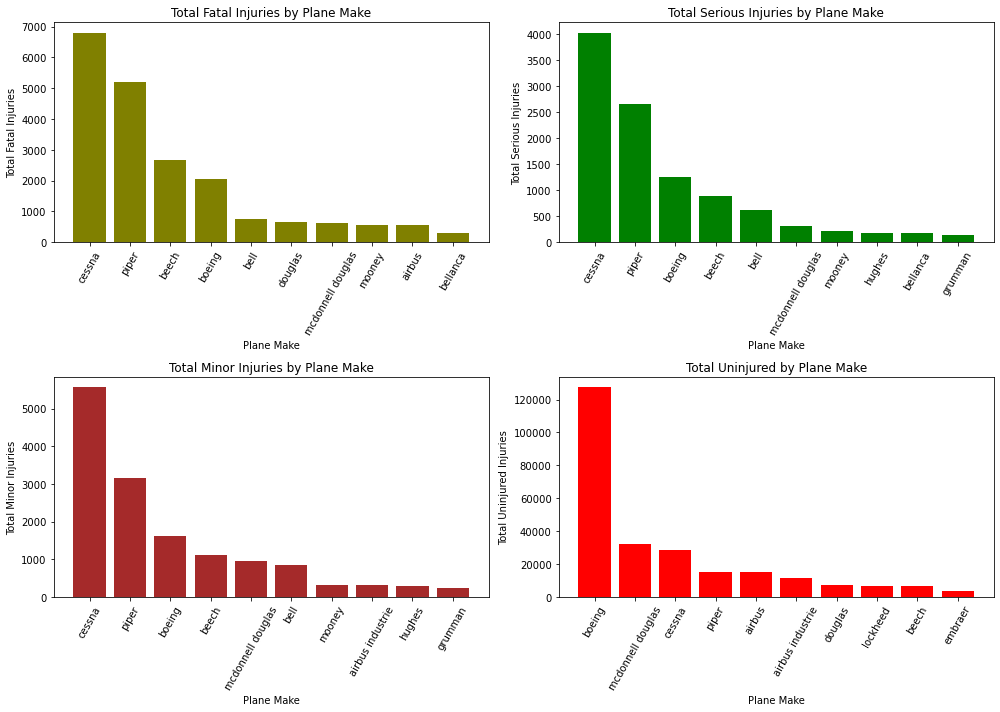

In [26]:
# Group by make
make_grouped = aviation_data.groupby('make').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum',
    'total_uninjured': 'sum'
}).reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (14, 10))

# Plot total fatal injuries
fatal_injuries = make_grouped.sort_values(by='total_fatal_injuries', ascending=False)[:10]
axes[0, 0].bar(fatal_injuries['make'], fatal_injuries['total_fatal_injuries'], color='olive')
axes[0, 0].set_title('Total Fatal Injuries by Plane Make')
axes[0, 0].set_xlabel('Plane Make')
axes[0, 0].set_ylabel('Total Fatal Injuries')
axes[0, 0].tick_params(axis='x', rotation=60)

# Plot total serious injuries
serious_injuries = make_grouped.sort_values(by='total_serious_injuries', ascending=False)[:10]
axes[0, 1].bar(serious_injuries['make'], serious_injuries['total_serious_injuries'], color='green')
axes[0, 1].set_title('Total Serious Injuries by Plane Make')
axes[0, 1].set_xlabel('Plane Make')
axes[0, 1].set_ylabel('Total Serious Injuries')
axes[0, 1].tick_params(axis='x', rotation=60)

# Plot total minor injuries
minor_injuries = make_grouped.sort_values(by='total_minor_injuries', ascending=False)[:10]
axes[1, 0].bar(minor_injuries['make'], minor_injuries['total_minor_injuries'], color='brown')
axes[1, 0].set_title('Total Minor Injuries by Plane Make')
axes[1, 0].set_xlabel('Plane Make')
axes[1, 0].set_ylabel('Total Minor Injuries')
axes[1, 0].tick_params(axis='x', rotation=60)

# Plot total uninjured
uninjured = make_grouped.sort_values(by='total_uninjured', ascending=False)[:10]
axes[1, 1].bar(uninjured['make'], uninjured['total_uninjured'], color='red')
axes[1, 1].set_title('Total Uninjured by Plane Make')
axes[1, 1].set_xlabel('Plane Make')
axes[1, 1].set_ylabel('Total Uninjured Injuries')
axes[1, 1].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

- Cessna has the most fatal, serious and minor injuries reported.
- Boeing has the most uninjured reported.

### Injured Passengers by Amateur Built

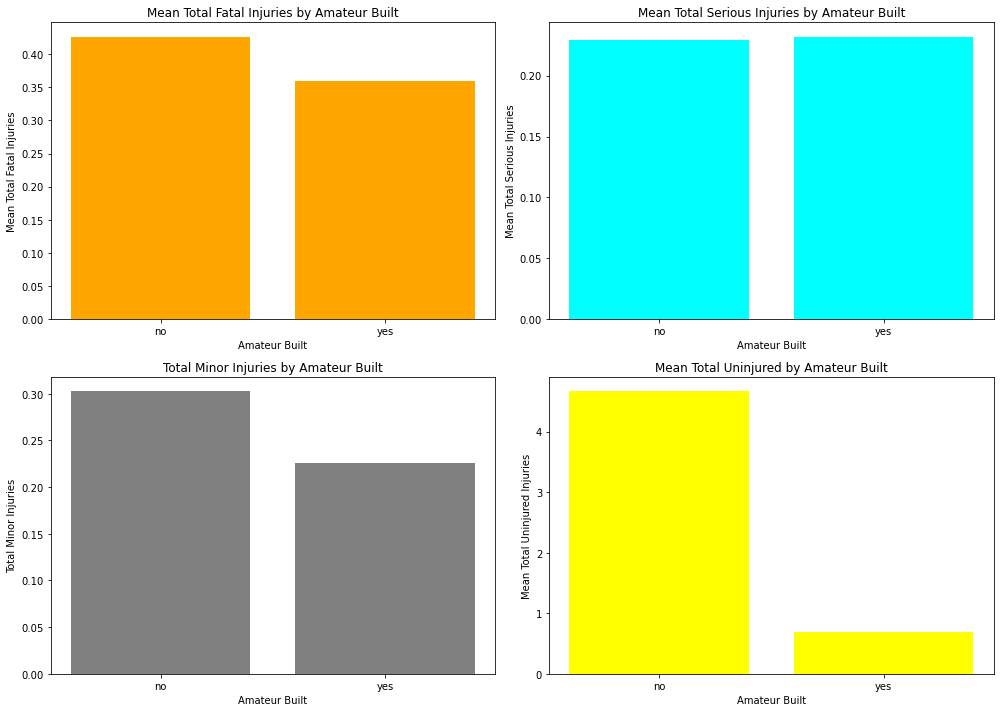

In [27]:
# Group by amateur built 
amateur_built_grouped = aviation_data.groupby('amateur_built').agg({
    'total_fatal_injuries': 'mean',
    'total_serious_injuries': 'mean',
    'total_minor_injuries': 'mean',
    'total_uninjured': 'mean'
}).reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (14, 10))

# Plot total fatal injuries
axes[0, 0].bar(amateur_built_grouped['amateur_built'], amateur_built_grouped['total_fatal_injuries'], color='orange')
axes[0, 0].set_title('Mean Total Fatal Injuries by Amateur Built')
axes[0, 0].set_xlabel('Amateur Built')
axes[0, 0].set_ylabel('Mean Total Fatal Injuries')

# Plot total serious injuries
axes[0, 1].bar(amateur_built_grouped['amateur_built'], amateur_built_grouped['total_serious_injuries'], color='cyan')
axes[0, 1].set_title('Mean Total Serious Injuries by Amateur Built')
axes[0, 1].set_xlabel('Amateur Built')
axes[0, 1].set_ylabel('Mean Total Serious Injuries')

# Plot total minor injuries
axes[1, 0].bar(amateur_built_grouped['amateur_built'], amateur_built_grouped['total_minor_injuries'], color='gray')
axes[1, 0].set_title('Total Minor Injuries by Amateur Built')
axes[1, 0].set_xlabel('Amateur Built')
axes[1, 0].set_ylabel('Total Minor Injuries')

# Plot total amateur_built_grouped
axes[1, 1].bar(amateur_built_grouped['amateur_built'], amateur_built_grouped['total_uninjured'], color='yellow')
axes[1, 1].set_title('Mean Total Uninjured by Amateur Built')
axes[1, 1].set_xlabel('Amateur Built')
axes[1, 1].set_ylabel('Mean Total Uninjured Injuries')

plt.tight_layout()
plt.show()

It is shown that:
- Non-amateur-built planes have more fatal, minor and uninjured.
- Amateur-built planes have more serious injuries.

As shown, the margin between non-amateur-built and amateur-built for uninjured injuries is longer than for fatal injuries, hence I think that non-amateur built planes are more safer despite having the most fatal injuries.

### Injured Passengers by Type of Engine of the Plane

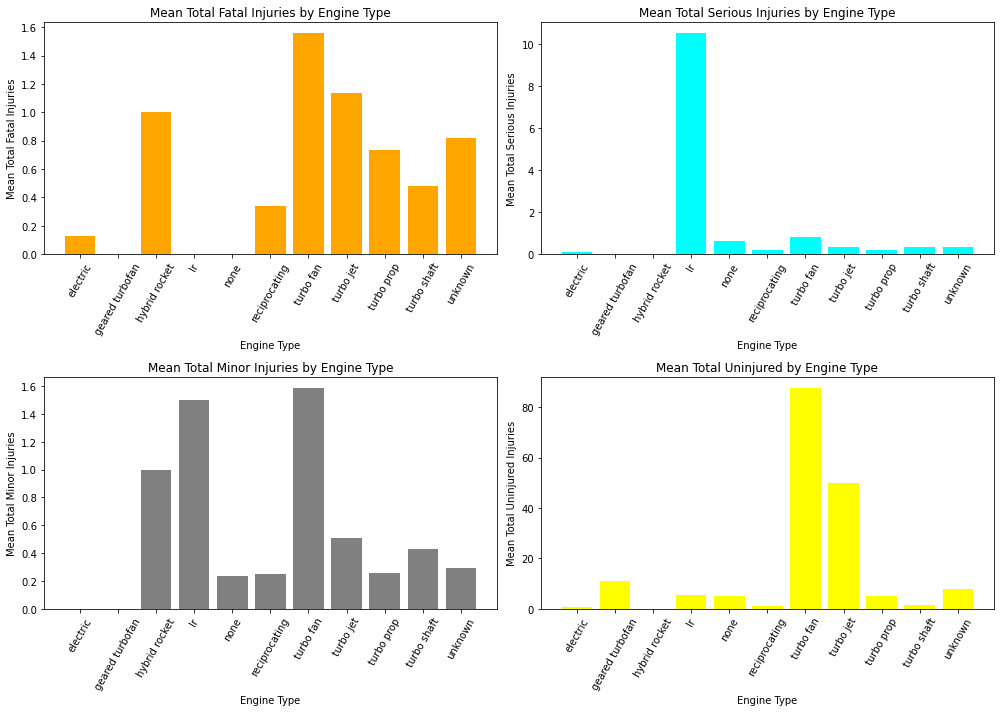

In [28]:
# Group by engine type
engine_type_grouped = aviation_data.groupby('engine_type').agg({
    'total_fatal_injuries': 'mean',
    'total_serious_injuries': 'mean',
    'total_minor_injuries': 'mean',
    'total_uninjured': 'mean'
}).reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (14, 10))

# Plot total fatal injuries
axes[0, 0].bar(engine_type_grouped['engine_type'], engine_type_grouped['total_fatal_injuries'], color='orange')
axes[0, 0].set_title('Mean Total Fatal Injuries by Engine Type')
axes[0, 0].set_xlabel('Engine Type')
axes[0, 0].set_ylabel('Mean Total Fatal Injuries')
axes[0, 0].tick_params(axis='x', rotation=60)

# Plot total serious injuries
axes[0, 1].bar(engine_type_grouped['engine_type'], engine_type_grouped['total_serious_injuries'], color='cyan')
axes[0, 1].set_title('Mean Total Serious Injuries by Engine Type')
axes[0, 1].set_xlabel('Engine Type')
axes[0, 1].set_ylabel('Mean Total Serious Injuries')
axes[0, 1].tick_params(axis='x', rotation=60)

# Plot total minor injuries
axes[1, 0].bar(engine_type_grouped['engine_type'], engine_type_grouped['total_minor_injuries'], color='gray')
axes[1, 0].set_title('Mean Total Minor Injuries by Engine Type')
axes[1, 0].set_xlabel('Engine Type')
axes[1, 0].set_ylabel('Mean Total Minor Injuries')
axes[1, 0].tick_params(axis='x', rotation=60)

# Plot total uninjured
axes[1, 1].bar(engine_type_grouped['engine_type'], engine_type_grouped['total_uninjured'], color='yellow')
axes[1, 1].set_title('Mean Total Uninjured by Engine Type')
axes[1, 1].set_xlabel('Engine Type')
axes[1, 1].set_ylabel('Mean Total Uninjured Injuries')
axes[1, 1].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()


- Turbo tan engine has the most fatal, minor injuries and uninjured.
- Lr engine has the most serious injuries.

### Injured Passengers by Number of Engines in a Plane

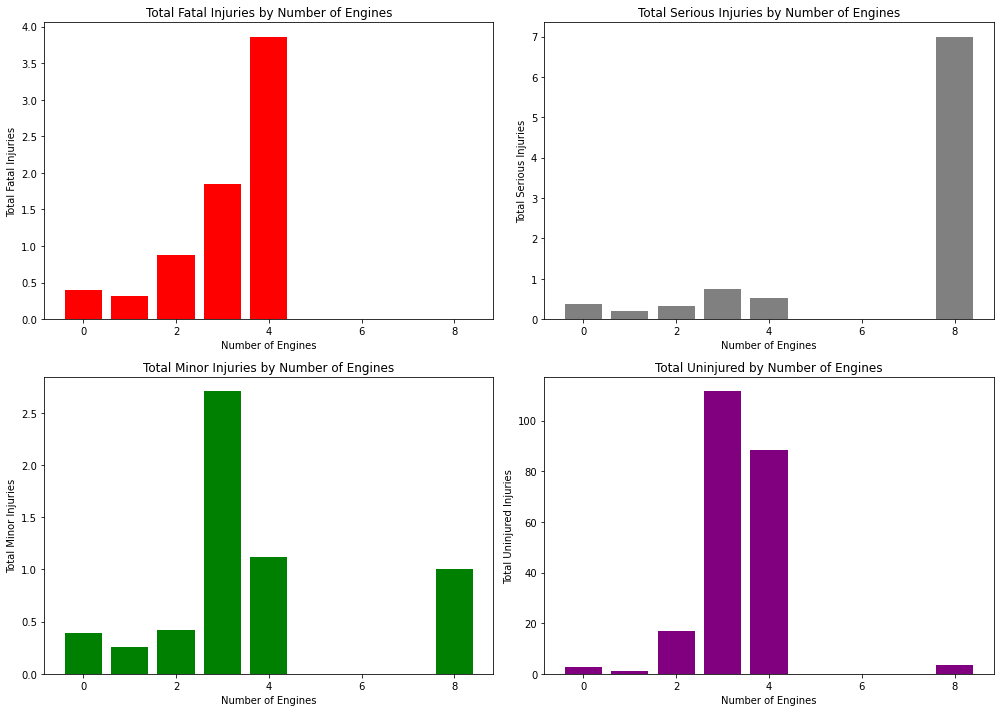

In [29]:
# Group by number of engines
number_of_engines_grouped = aviation_data.groupby('number_of_engines').agg({
    'total_fatal_injuries': 'mean',
    'total_serious_injuries': 'mean',
    'total_minor_injuries': 'mean',
    'total_uninjured': 'mean'
}).reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize = (14, 10))

# Plot total fatal injuries
axes[0, 0].bar(number_of_engines_grouped['number_of_engines'], number_of_engines_grouped['total_fatal_injuries'], color='red')
axes[0, 0].set_title('Total Fatal Injuries by Number of Engines')
axes[0, 0].set_xlabel('Number of Engines')
axes[0, 0].set_ylabel('Total Fatal Injuries')

# Plot total serious injuries
axes[0, 1].bar(number_of_engines_grouped['number_of_engines'], number_of_engines_grouped['total_serious_injuries'], color='grey')
axes[0, 1].set_title('Total Serious Injuries by Number of Engines')
axes[0, 1].set_xlabel('Number of Engines')
axes[0, 1].set_ylabel('Total Serious Injuries')

# Plot total minor injuries
axes[1, 0].bar(number_of_engines_grouped['number_of_engines'], number_of_engines_grouped['total_minor_injuries'], color='green')
axes[1, 0].set_title('Total Minor Injuries by Number of Engines')
axes[1, 0].set_xlabel('Number of Engines')
axes[1, 0].set_ylabel('Total Minor Injuries')

# Plot total uninjured
axes[1, 1].bar(number_of_engines_grouped['number_of_engines'], number_of_engines_grouped['total_uninjured'], color='purple')
axes[1, 1].set_title('Total Uninjured by Number of Engines')
axes[1, 1].set_xlabel('Number of Engines')
axes[1, 1].set_ylabel('Total Uninjured Injuries')

plt.tight_layout()
plt.show()

- Planes with 4 engines have the most fatal injuries.
- Plane with 8 engines have the most serious injuries.
- Planes with 3 engines have the most minor injuries and uninjured.

However, I do not think the number  of engines in a plane affects the number of injured/ uninjured. Let's find the correlation between the number of engines and the injuries/ uninjured.

### Correlation Between Number of Engines and Injuries/ Uninjured

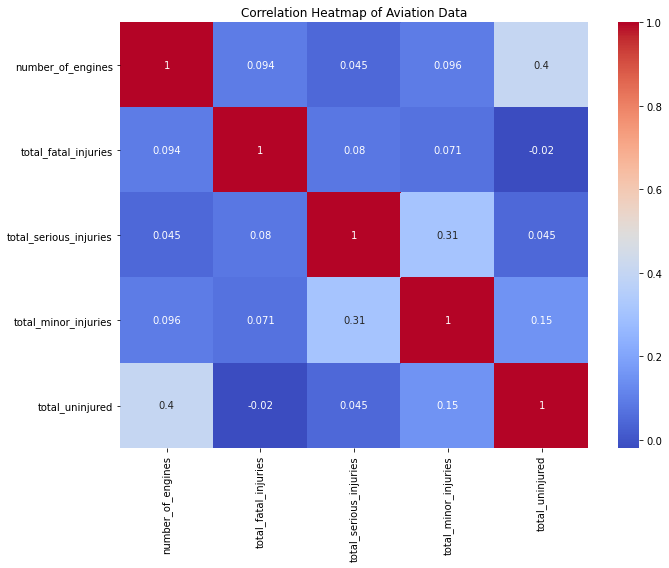

In [30]:
# Create subplots
fig, ax = plt.subplots(figsize = (10, 8))

# Plot
sns.heatmap(aviation_data.corr(), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap of Aviation Data')

plt.tight_layout()
plt.show()

In looking at the heatmap above, the highest correlation coefficient apart from 1 is 0.4 (weak positive correlation) and the lowest is -0.02 (weak negative correlation).

When you look at the column of number of engines, its correlation with other columns is less than 0.1. This means that the number of engines is not correlated with injuries hence it cannot be said that the number of engines in a plane affects the number of injuries/ uninjured.

## Conclusions

Accidents happen; they can be or can not be prevented. It is impractical to say that a certain aircraft will never be able to incur an accident. Make, model and other features of a plane may affect it but other measures should also be put in place by the company such as safety measures, etc.

Based on the analysis done:
- Model, make and type of engine affects the number of injuries/ unijured. 
- Number of engines in a plane is uncorrelated to the number of injuries/ uninjured.

## Recommendations

I would recommend the company to consider the following:
- Model of the aircraft: model 737. Even though it has the highest fatalities, it also has the highest number of uninjured. If more safety measures are put in place, the number of uninjured can surpass the injured.
- Make of the aircraft: Boeing. It shows to be the most safest due it is high number of uninjured and moderate numbers of injuries.
- Professionally built planes. Professionally built planes have proven to have more uninjured passengers as compared to amateur built ones.
- Type of engine: turbo tan engine since it had the most number of uninjured people.

If interested in a number of options, consider the following makes:
- Boeing 
- Mcdonnel 
- Douglas
- Piper
- Airbus